In [ ]:
import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key="53d43b5cb3908c1239642d555ae02150551cf89d")

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-12-05 00:00:00+00:00,109.11,110.03,108.25,110.00,34324540,25.672732,25.889200,25.470380,25.882142,137298160,0.0,1.0
1,AAPL,2016-12-06 00:00:00+00:00,109.95,110.36,109.19,109.50,26195462,25.870377,25.966847,25.691555,25.764496,104781848,0.0,1.0
2,AAPL,2016-12-07 00:00:00+00:00,111.03,111.19,109.16,109.26,29998719,26.124493,26.162139,25.684496,25.708025,119994876,0.0,1.0
3,AAPL,2016-12-08 00:00:00+00:00,112.12,112.43,110.60,110.86,27068316,26.380961,26.453902,26.023317,26.084493,108273264,0.0,1.0
4,AAPL,2016-12-09 00:00:00+00:00,113.95,114.70,112.31,112.31,34402627,26.811546,26.988015,26.425667,26.425667,137610508,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-11-24 00:00:00+00:00,161.94,162.14,159.6400,160.750,69463623,161.94,162.14,159.6400,160.750,69463623,0.0,1.0
1253,AAPL,2021-11-26 00:00:00+00:00,156.81,160.45,156.3600,159.565,76959752,156.81,160.45,156.3600,159.565,76959752,0.0,1.0
1254,AAPL,2021-11-29 00:00:00+00:00,160.24,161.19,158.7901,159.370,88748217,160.24,161.19,158.7901,159.370,88748217,0.0,1.0
1255,AAPL,2021-11-30 00:00:00+00:00,165.30,165.52,159.9200,159.985,174048056,165.30,165.52,159.9200,159.985,174048056,0.0,1.0
1256,AAPL,2021-12-01 00:00:00+00:00,164.77,170.30,164.5300,167.480,152423003,164.77,170.30,164.5300,167.480,152423003,0.0,1.0


In [ ]:
df.shape

(1257, 14)

In [ ]:
df1=df.reset_index()['close']

0       109.11
1       109.95
2       111.03
3       112.12
4       113.95
         ...  
1252    161.94
1253    156.81
1254    160.24
1255    165.30
1256    164.77
Name: close, Length: 1257, dtype: float64

In [ ]:
df1.shape

(1257,)

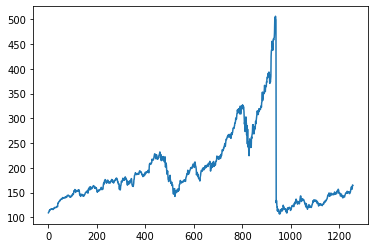

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

0       109.11
1       109.95
2       111.03
3       112.12
4       113.95
         ...  
1252    161.94
1253    156.81
1254    160.24
1255    165.30
1256    164.77
Name: close, Length: 1257, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.00568566],
       [0.00778961],
       [0.01049468],
       ...,
       [0.13375078],
       [0.14642455],
       [0.14509706]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
train_data

array([[0.00568566],
       [0.00778961],
       [0.01049468],
       [0.0132248 ],
       [0.01780839],
       [0.01618034],
       [0.02091421],
       [0.02091421],
       [0.02249217],
       [0.02286788],
       [0.02454602],
       [0.02532248],
       [0.025598  ],
       [0.02366938],
       [0.02424546],
       [0.02609894],
       [0.02484659],
       [0.02477145],
       [0.02249217],
       [0.02331872],
       [0.02299311],
       [0.02447088],
       [0.02772699],
       [0.03043206],
       [0.03073262],
       [0.03233563],
       [0.03108328],
       [0.03055729],
       [0.0329618 ],
       [0.03293676],
       [0.03241077],
       [0.0329618 ],
       [0.03316218],
       [0.03288666],
       [0.03767063],
       [0.03782091],
       [0.03784596],
       [0.03704446],
       [0.03634314],
       [0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.05873513],
       [0.06184095],
       [0.06311835],
       [0.06407013],
       [0.06331872],
       [0.066

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.00568566 0.00778961 0.01049468 ... 0.09227301 0.09254853 0.09219787]
 [0.00778961 0.01049468 0.0132248  ... 0.09254853 0.09219787 0.09953663]
 [0.01049468 0.0132248  0.01780839 ... 0.09219787 0.09953663 0.101866  ]
 ...
 [0.30111459 0.2944521  0.30103945 ... 0.46539762 0.41748278 0.41708203]
 [0.2944521  0.30103945 0.30870382 ... 0.41748278 0.41708203 0.48082655]
 [0.30103945 0.30870382 0.32403256 ... 0.41708203 0.48082655 0.45705698]]


In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)



Epoch 1/100
12/12 [==============================] - 9s 324ms/step - loss: 0.0171 - val_loss: 0.0234
Epoch 2/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0042 - val_loss: 0.0271
Epoch 3/100
12/12 [==============================] - 2s 196ms/step - loss: 0.0019 - val_loss: 0.0233
Epoch 4/100
12/12 [==============================] - 2s 200ms/step - loss: 9.2535e-04 - val_loss: 0.0264
Epoch 5/100
12/12 [==============================] - 2s 201ms/step - loss: 7.6555e-04 - val_loss: 0.0243
Epoch 6/100
12/12 [==============================] - 2s 199ms/step - loss: 7.2260e-04 - val_loss: 0.0231
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 6.7862e-04 - val_loss: 0.0217
Epoch 8/100
12/12 [==============================] - 2s 193ms/step - loss: 6.7912e-04 - val_loss: 0.0213
Epoch 9/100
12/12 [==============================] - 2s 196ms/step - loss: 6.3325e-04 - val_loss: 0.0217
Epoch 10/100
12/12 [==============================] - 2s 196ms/step

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

199.36361462771157

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

175.24885923935676

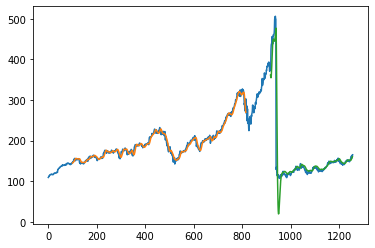

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.09718221665623034,
 0.10597370068879147,
 0.10429555416405756,
 0.09906073888541006,
 0.08919223544145266,
 0.09845961177207263,
 0.0965810895428929,
 0.10008766437069505,
 0.10449592986850342,
 0.1055729492798998,
 0.10001252348152784,
 0.0955291170945522,
 0.09718221665623034,
 0.0977332498434565,
 0.09688165309956165,
 0.10149029430181589,
 0.10046336881653095,
 0.10073888541014397,
 0.09843456480901686,
 0.0983093299937382,
 0.09708202880400746,
 0.0977332498434565,
 0.10532247964934244,
 0.10584846587351276,
 0.11090795241077017,
 0.10857858484658728,
 0.09898559799624296,
 0.09983719474013769,
 0.10356919223544142,
 0.10737633061991231,
 0.10715090795241072,
 0.10399499060738887,
 0.101941139636819,
 0.1045961177207263,
 0.11591734502191609,
 0.11268628678772696,
 0.11438948027551654,
 0.11724483406386971,
 0.11887288666249218,
 0.12485911083281148,
 0.12090169067000628,
 0.11829680651221036,
 0.1055228553537883,
 0.10697557921102063,
 0.10339386349405133,
 0.10567313713212267

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.13907519]
101
1 day input [0.1059737  0.10429555 0.09906074 0.08919224 0.09845961 0.09658109
 0.10008766 0.10449593 0.10557295 0.10001252 0.09552912 0.09718222
 0.09773325 0.09688165 0.10149029 0.10046337 0.10073889 0.09843456
 0.09830933 0.09708203 0.09773325 0.10532248 0.10584847 0.11090795
 0.10857858 0.0989856  0.09983719 0.10356919 0.10737633 0.10715091
 0.10399499 0.10194114 0.10459612 0.11591735 0.11268629 0.11438948
 0.11724483 0.11887289 0.12485911 0.12090169 0.11829681 0.10552286
 0.10697558 0.10339386 0.10567314 0.10507201 0.09823419 0.09041954
 0.09164684 0.0977082  0.10016281 0.10038823 0.09650595 0.0878397
 0.09014402 0.08681277 0.08969317 0.08090169 0.08583594 0.08806512
 0.09129618 0.09031935 0.09009393 0.08683782 0.085335   0.09247339
 0.09517846 0.09946149 0.10499687 0.10624922 0.10680025 0.10482154
 0.10469631 0.1063995  0.10522229 0.11453976 0.10760175 0.10549781
 0.10815279 0.11183469 0.1105072  0.1113087  0.10920476 0.1101315
 0.10289292 0.10276769 0.10807765 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1257

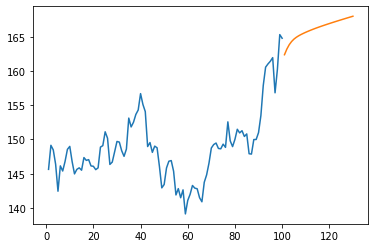

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

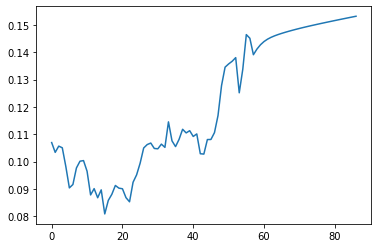

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

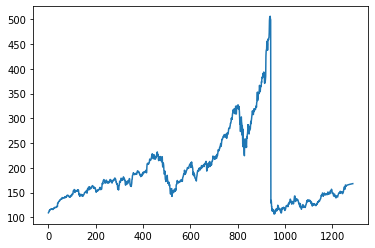

In [ ]:
plt.plot(df3)